# Model Training for Real Time Communication through AI for Specially Abled
### Loading the Dataset & Image Data Generation

In [1]:
pwd

'/home/wsuser/work'

In [2]:
!pip install tensorflow==2.7.1

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2022-11-18 20:43:54.615649: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ibm/dsdriver/lib:/opt/oracle/lib:/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow


In [4]:
# Training Datagen
train_datagen = ImageDataGenerator(rescale=1/255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
# Testing Datagen
test_datagen = ImageDataGenerator(rescale=1/255)

In [5]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='fMbxNJObZGHCk-qraQn0oRNFF1d_jtltl_lIuJ8JFPOv',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'speciallyabled-donotdelete-pr-bk26yqqrbpgz3k'
object_key = 'Dataset.zip'

streaming_body_2 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [6]:
# Unzip the Dataset Zip File
from io import BytesIO
import zipfile
unzip = zipfile.ZipFile(BytesIO(streaming_body_2.read()), 'r')
file_paths = unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [7]:
%%bash
ls Dataset

test_set
training_set


In [8]:
# Training Dataset
x_train=train_datagen.flow_from_directory(r'/home/wsuser/work/Dataset/training_set',target_size=(64,64), class_mode='categorical',batch_size=900)
# Testing Dataset
x_test=test_datagen.flow_from_directory(r'/home/wsuser/work/Dataset/test_set',target_size=(64,64), class_mode='categorical',batch_size=900)

Found 15750 images belonging to 9 classes.
Found 2250 images belonging to 9 classes.


In [9]:
print("Len x-train : ", len(x_train))
print("Len x-test : ", len(x_test))

Len x-train :  18
Len x-test :  3


In [10]:
# The Class Indices in Training Dataset
x_train.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

### Model Creation

In [13]:
# Importing Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [14]:
# Creating Model
model=Sequential()

In [15]:
# Adding Layers
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

# Adding Hidden Layers
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

# Adding Output Layer
model.add(Dense(9,activation='softmax'))

In [16]:
# Compiling the Model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
# Fitting the Model Generator
model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))

/tmp/wsuser/ipykernel_4761/1042518445.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))


Epoch 1/10
18/18 [==============================] - 71s 4s/step - loss: 1.0100 - accuracy: 0.6564 - val_loss: 0.3664 - val_accuracy: 0.8951
Epoch 2/10
18/18 [==============================] - 72s 4s/step - loss: 0.2140 - accuracy: 0.9380 - val_loss: 0.2692 - val_accuracy: 0.9382
Epoch 3/10
18/18 [==============================] - 71s 4s/step - loss: 0.0943 - accuracy: 0.9739 - val_loss: 0.2352 - val_accuracy: 0.9636
Epoch 4/10
18/18 [==============================] - 71s 4s/step - loss: 0.0547 - accuracy: 0.9860 - val_loss: 0.2300 - val_accuracy: 0.9716
Epoch 5/10
18/18 [==============================] - 71s 4s/step - loss: 0.0311 - accuracy: 0.9923 - val_loss: 0.2448 - val_accuracy: 0.9738
Epoch 6/10
18/18 [==============================] - 70s 4s/step - loss: 0.0223 - accuracy: 0.9946 - val_loss: 0.2502 - val_accuracy: 0.9716
Epoch 7/10
18/18 [==============================] - 69s 4s/step - loss: 0.0155 - accuracy: 0.9962 - val_loss: 0.2834 - val_accuracy: 0.9769
Epoch 8/10
18/18 [==

# Saving the Model

In [18]:
model.save('IBM_Communication_Model.h5')
# Current accuracy is 0.8154

In [19]:
# Convert the Saved Model to a Tar Compressed Format
!tar -zcvf IBM_TrainedModel.tgz IBM_Communication_Model.h5

IBM_Communication_Model.h5


In [20]:
%%bash
ls -ll

total 209860
drwxrwx--- 4 wsuser wscommon      4096 Nov 18 19:56 Dataset
-rw-rw---- 1 wsuser wscommon 111324760 Nov 18 20:56 IBM_Communication_Model.h5
-rw-rw---- 1 wsuser wscommon 103556980 Nov 18 20:57 IBM_TrainedModel.tgz


### Watson Machine Learning

In [21]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 16.7 MB/s eta 0:00:01


In [23]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": "FF7OJc9SZk2hQqElN_oUgfNuYnlGFgZDwqlIQBo938QW"
}

client = APIClient(wml_credentials)

### Save to Deployment Space

In [24]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    return (next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [25]:
space_uid = guid_from_space_name(client, 'model_deployment')
print("Space UID : ", space_uid)

Space UID :  87cd1d60-d650-4f7a-9f74-7abd42eb8467


In [26]:
client.set.default_space(space_uid)

'SUCCESS'

In [27]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [28]:
software_spec_uid = client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")
software_spec_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [29]:
model_details = client.repository.store_model(model='IBM_TrainedModel.tgz', meta_props={
    client.repository.ModelMetaNames.NAME: "CNN",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid,
    client.repository.ModelMetaNames.TYPE: "tensorflow_2.7"})
model_id = client.repository.get_model_uid(model_details)

This method is deprecated, please use get_model_id()


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/ibm_watson_machine_learning/repository.py:1453: UserWarning: This method is deprecated, please use get_model_id()
  warn("This method is deprecated, please use get_model_id()")


In [30]:
model_id

'70421886-66e1-415b-ae41-2bd499106692'

In [35]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [38]:
model=load_model('IBM_Communication_Model.h5')

In [44]:
model=load_model('IBM_Communication_Model.h5')
img=image.load_img(r'/home/wsuser/work/Dataset/test_set/D/2.png',target_size=(64,64))

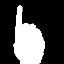

In [45]:
img

In [46]:
x=image.img_to_array(img)

In [47]:
x.ndim

3

In [48]:
x=np.expand_dims(x,axis=0)

In [49]:
x.ndim

4

In [50]:
pred=np.argmax(model.predict(x),axis=1)

In [51]:
pred

array([3])

In [52]:
index=['A','B','C','D','E','F','G','H','I']
print(index[pred[0]])

D
